In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dfnitro3v2.csv', index_col = 0)
df.set_index('new_date', inplace = True)

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df.select_dtypes(include = numerics).columns)
df = df[numerical_vars]
df.shape

(67040, 49)

In [9]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels = 'TN', axis = 1), df['TN'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((46928, 48), (20112, 48))

In [7]:
seed_val = 777
np.random.seed(seed_val)

In [ ]:
#Hybrid Recursive Feature Elimination 

In [8]:
model_all_features = xgb.XGBRegressor()
model_all_features.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [11]:
y_pred_test = model_all_features.predict(X_test)
explained_variance_score_score_all = explained_variance_score(y_test, y_pred_test)
print('Test all features xgb explained variance score = %f' %(explained_variance_score_score_all))

Test all features xgb explained variance score = 0.473210


In [15]:
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns
features.sort_values(ascending = True, inplace = True)

In [17]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

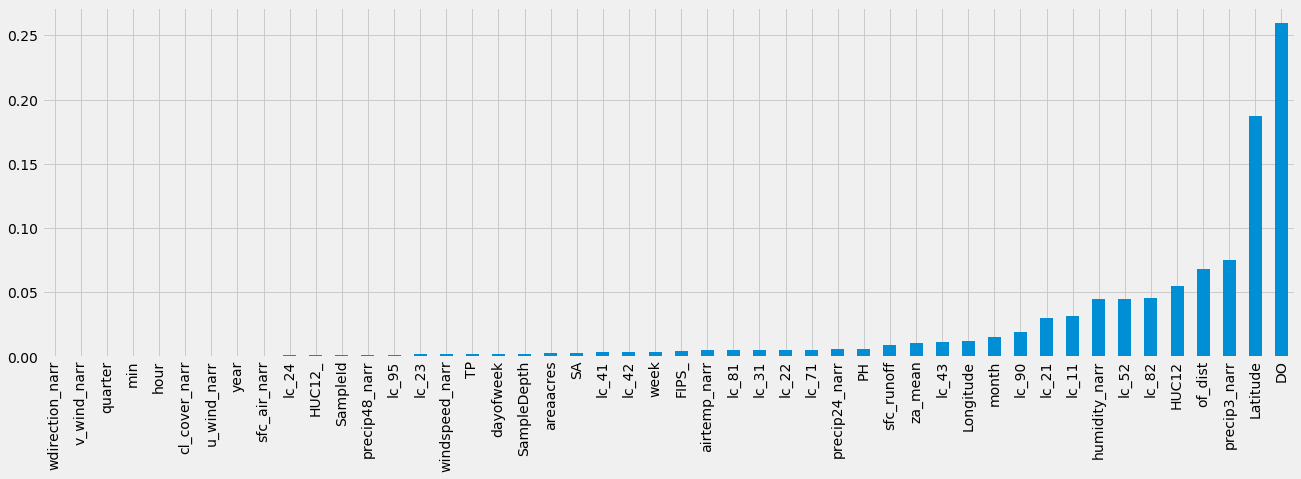

In [19]:
features.plot.bar(figsize=(20,6));

In [20]:
features = list(features.index)
features

['wdirection_narr',
 'v_wind_narr',
 'quarter',
 'min',
 'hour',
 'cl_cover_narr',
 'u_wind_narr',
 'year',
 'sfc_air_narr',
 'lc_24',
 'HUC12_',
 'SampleId',
 'precip48_narr',
 'lc_95',
 'lc_23',
 'windspeed_narr',
 'TP',
 'dayofweek',
 'SampleDepth',
 'areaacres',
 'SA',
 'lc_41',
 'lc_42',
 'week',
 'FIPS_',
 'airtemp_narr',
 'lc_81',
 'lc_31',
 'lc_22',
 'lc_71',
 'precip24_narr',
 'PH',
 'sfc_runoff',
 'za_mean',
 'lc_43',
 'Longitude',
 'month',
 'lc_90',
 'lc_21',
 'lc_11',
 'humidity_narr',
 'lc_52',
 'lc_82',
 'HUC12',
 'of_dist',
 'precip3_narr',
 'Latitude',
 'DO']

In [21]:
tol = 0.001
print('doing recursive feature elimination')
features_to_remove = []
count = 1

for feature in features:
    print()
    print('testing feature: ', feature, ' which is feature ', count, ' out of ', len(features))
    count = count + 1
    
    #initialize model
    model_int = xgb.XGBRegressor()
    
    model_int.fit(X_train.drop(features_to_remove + [feature], axis =1), y_train)
    y_pred_test = model_int.predict(X_test.drop(features_to_remove + [feature], axis = 1))
    
    #new Explained ratio 
    explained_variance_score_int = explained_variance_score(y_test, y_pred_test)
    print('New explained variance score = {}'.format(explained_variance_score_int))
    
    #print all the original explained ratio with all features
    print('Test all features xgb explained variance score = {}'.format(explained_variance_score_score_all))
    
    diff_explained_ratio = explained_variance_score_score_all - explained_variance_score_int
    
    if diff_explained_ratio >= tol:
        print('Drop in explained ratio = {}'.format(diff_explained_ratio))
        print('keep: ', feature)
        print()
        
    else:
        print('Drop in explained ratio = {}'.format(diff_explained_ratio))
        print('remove: ', feature)
        print()
        
        #The remaining features
        explained_variance_score_score_all = explained_variance_score_int
        
        #append teh feature to remove to collecting list
        features_to_remove.append(feature)
print('Done!!')
print('total features to remove: ', len(features_to_remove))
    

doing recursive feature elimination

testing feature:  wdirection_narr  which is feature  1  out of  48
New explained variance score = 0.473209865699172
Test all features xgb explained variance score = 0.473209865699172
Drop in explained ratio = 0.0
remove:  wdirection_narr


testing feature:  v_wind_narr  which is feature  2  out of  48
New explained variance score = 0.473209865699172
Test all features xgb explained variance score = 0.473209865699172
Drop in explained ratio = 0.0
remove:  v_wind_narr


testing feature:  quarter  which is feature  3  out of  48
New explained variance score = 0.473209865699172
Test all features xgb explained variance score = 0.473209865699172
Drop in explained ratio = 0.0
remove:  quarter


testing feature:  min  which is feature  4  out of  48
New explained variance score = 0.48170160928197403
Test all features xgb explained variance score = 0.473209865699172
Drop in explained ratio = -0.008491743582802025
remove:  min


testing feature:  hour  which i

New explained variance score = 0.5080682756719489
Test all features xgb explained variance score = 0.50814059661957
Drop in explained ratio = 7.23209476211073e-05
remove:  lc_43


testing feature:  Longitude  which is feature  36  out of  48
New explained variance score = 0.43792164588534765
Test all features xgb explained variance score = 0.5080682756719489
Drop in explained ratio = 0.07014662978660124
keep:  Longitude


testing feature:  month  which is feature  37  out of  48
New explained variance score = 0.51056860488645
Test all features xgb explained variance score = 0.5080682756719489
Drop in explained ratio = -0.0025003292145010514
remove:  month


testing feature:  lc_90  which is feature  38  out of  48
New explained variance score = 0.49339876552550155
Test all features xgb explained variance score = 0.51056860488645
Drop in explained ratio = 0.017169839360948402
keep:  lc_90


testing feature:  lc_21  which is feature  39  out of  48
New explained variance score = 0.467341

In [24]:
features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))

total features to keep:  38


In [25]:
features_to_keep

['hour',
 'cl_cover_narr',
 'u_wind_narr',
 'year',
 'lc_24',
 'SampleId',
 'precip48_narr',
 'lc_95',
 'lc_23',
 'windspeed_narr',
 'TP',
 'dayofweek',
 'SampleDepth',
 'areaacres',
 'SA',
 'lc_41',
 'lc_42',
 'week',
 'FIPS_',
 'airtemp_narr',
 'lc_81',
 'lc_31',
 'lc_22',
 'lc_71',
 'precip24_narr',
 'PH',
 'za_mean',
 'Longitude',
 'lc_90',
 'lc_21',
 'humidity_narr',
 'lc_52',
 'lc_82',
 'HUC12',
 'of_dist',
 'precip3_narr',
 'Latitude',
 'DO']